<a href="https://colab.research.google.com/github/arnav-007/Regression-Discontinuity-Analysis-on-Bank-Debits_Arnav/blob/main/Regression_Discontinuity_Analysis_on_Bank_Debits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
bank_data = pd.read_csv('/content/bank_data.csv')

In [3]:
bank_data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
bank_data.tail()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female
1881,522,9964,16706.305920,Level 4 Recovery,53,Male


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [6]:
bank_data.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [7]:
bank_data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


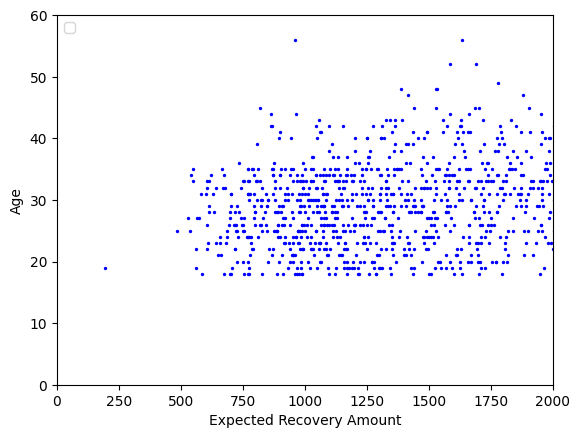

In [8]:
%matplotlib inline
plt.scatter(x=bank_data['expected_recovery_amount'], y=bank_data['age'], c="b", s=2)
plt.xlim(0, 2000)
plt.ylim(0, 60)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.legend(loc=2)
plt.show()

In [9]:
from scipy import stats
new_df = bank_data.loc[(bank_data['expected_recovery_amount'] < 1100) &
                            (bank_data['expected_recovery_amount'] >= 900)]
by_recovery_strategy = new_df.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()

Level_0_age = new_df.loc[bank_data['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = new_df.loc[bank_data['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(Level_0_age,Level_1_age)

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

In [10]:
# Number of customers in each sex

gender_data = bank_data.loc[(bank_data['expected_recovery_amount'] < 1100) &
                            (bank_data['expected_recovery_amount'] >= 900)]

gender = pd.crosstab(gender_data['sex'], gender_data['recovery_strategy'])


print(gender)
# Chi-square test

chi2_stat, p_val, dof, ex = stats.chi2_contingency(gender)
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)

recovery_strategy  Level 0 Recovery  Level 1 Recovery
sex                                                  
Female                           32                39
Male                             57                55
Chi-square Statistic: 0.3796422112341753
P-value: 0.5377947810444592


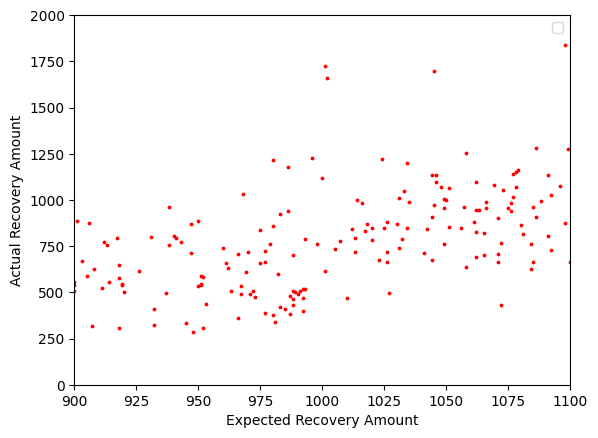

In [11]:
# Scatter plot of Actual Recovery Amount vs. Expected Recovery Amount
plt.scatter(x=bank_data['expected_recovery_amount'], y=bank_data['actual_recovery_amount'], c="r", s=3)
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.legend(loc=1)
plt.show()

In [12]:
# Compute average actual recovery amount just below and above the threshold
by_recovery_strategy['actual_recovery_amount'].describe().unstack()
# Perform Kruskal-Wallis test
Level_0_actual = new_df.loc[bank_data['recovery_strategy']=="Level 0 Recovery"]['actual_recovery_amount']
Level_1_actual = new_df.loc[bank_data['recovery_strategy']=="Level 1 Recovery"]['actual_recovery_amount']

stats.kruskal(Level_0_actual,Level_1_actual)
# Repeat for a smaller range of $950 to $1050
new_df2 = bank_data.loc[(bank_data['expected_recovery_amount'] < 1050) &
                            (bank_data['expected_recovery_amount'] >= 950)]
by_recovery_strategy = new_df2.groupby(['recovery_strategy'])
by_recovery_strategy['actual_recovery_amount'].describe().unstack()
Level_0_actual = new_df2.loc[bank_data['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = new_df2.loc[bank_data['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual,Level_1_actual)



KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)

In [13]:
# Import statsmodels
import statsmodels.api as sm

# Define X and y
X = new_df['expected_recovery_amount']
Y = new_df['actual_recovery_amount']
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Mon, 22 Jan 2024   Prob (F-statistic):           1.56e-13
Time:                            18:25:25   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
bank_data['threshold'] = np.where(bank_data['expected_recovery_amount']<1000, 0, 1)
new_df = bank_data.loc[(bank_data['expected_recovery_amount']<1100) &
                (bank_data['expected_recovery_amount']>=900)]
X = new_df[['expected_recovery_amount','threshold']]
Y = new_df['actual_recovery_amount']
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Mon, 22 Jan 2024   Prob (F-statistic):           1.83e-15
Time:                            18:25:25   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
threshold                  277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
new_df2 = bank_data.loc[(bank_data['expected_recovery_amount']<1050) &
                        (bank_data['expected_recovery_amount']>=950)]

X = new_df2[['expected_recovery_amount','threshold']]
Y = new_df2['actual_recovery_amount']
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Mon, 22 Jan 2024   Prob (F-statistic):           1.12e-07
Time:                            18:25:25   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
threshold                  286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""